In [22]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Gradient Descent

Example for learning gradient descent

In [23]:
np.random.seed(101)

In [24]:
n, d = 100, 3   # 100 Sample, 3 Feature
X = np.random.rand(n, d) # Generate random number for samples
w = np.array([2, 6, 1]) # Determination weights of each feature 

y = np.dot(X, w.reshape(d, 1)) + np.random.randn(100, 1)


In [25]:
x = np.column_stack((np.ones((100, 1)), X)) # Add Factor of one for w_0 feature

## What is the Cost Function?

The primary set-up for learning neural networks is to define a cost function (also known as a loss function) that measures how well the network predicts outputs on the test set. The goal is to then find a set of weights and biases that minimizes the cost. One common function that is often used is the mean squared error, which measures the difference between the actual value of $ y $ and the estimated value of y (the prediction). The equation of the below regression line is $ h_θ(x) = θ + θ_1 x $ , which has only two parameters: weight $ (θ_1) $ and bias $ (θ_0) $.


![cost_piucture](./pictures/cost.png)

In [26]:
def cost_function(X, y, w):
    n, d = X.shape
    y_predict = X @ w
    return np.sum((y - y_predict) ** 2) / (2 * n)

## Minimising Cost function


> The goal of any Machine Learning model is to minimize the Cost Function.

![minimize_cost](./pictures/minimize_cost.png)

## How to Minimise the Cost Function

Our goal is to move from the mountain in the top right corner (high cost) to the dark blue sea in the bottom left (low cost). In order to get the lowest error value, we need to adjust the weights ‘θ0’ and ‘θ1’ to reach the smallest possible error. This is because the result of a lower error between the actual and the predicted values means the algorithm has done a good job in learning. Gradient descent is an efficient optimization algorithm that attempts to find a local or global minimum of a function.

### Calculating gradient descent


Gradient Descent runs iteratively to find the optimal values of the parameters corresponding to the minimum value of the given cost function, using calculus. Mathematically, the technique of the ‘derivative’ is extremely important to minimise the cost function because it helps get the minimum point. The derivative is a concept from calculus and refers to the slope of the function at a given point. We need to know the slope so that we know the direction (sign) to move the coefficient values in order to get a lower cost on the next iteration.

![gradient_descent](./pictures/gd.png)

In [27]:
def gradient(X, y, w):
    n, d = X.shape
    grad = (X.T @ (X @ w - y)) /n
    return grad

In [28]:
def line_search(X, y, w, alpha=0.001, beta=0.7):
    cost = cost_function(X, y, w)
    grad = gradient(X, y, w)
    step_size = 5

    while cost_function(X, y, w - step_size * grad) > cost + alpha:
        step_size = beta * step_size

    return step_size

In [29]:
def gradient_descent(X, y, alpha=0.001, beta=0.7, num_iterate=100):
    n, d = X.shape
    w = np.zeros((d, 1))

    costs = []
    for i in range(num_iterate):
        step_size = line_search(X, y, w, alpha, beta)
        w = w - step_size * gradient(X, y, w)
        costs.append(cost_function(X, y, w))
        
    return w, costs

In [30]:
w_pred, gd_costs = gradient_descent(X, y, num_iterate=50)


In [31]:
w_pred

array([[2.21633773],
       [5.93633991],
       [0.77449263]])

In [32]:
(X @ w_pred).shape

(100, 1)

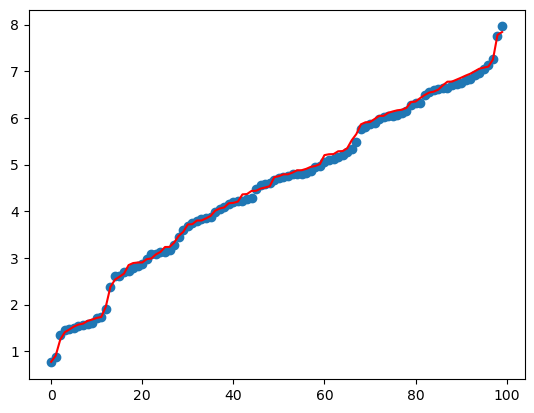

In [33]:
plt.scatter(x = np.arange(len(sorted(X @ w_pred))), y =sorted((X @ w_pred)))
plt.plot(np.arange(len(sorted(X @ w))), sorted(X @ w), color='red')


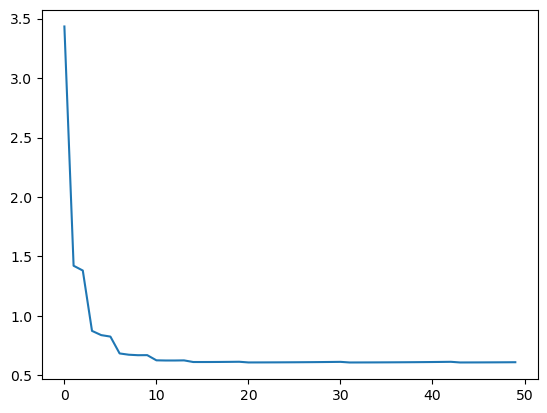

In [35]:
plt.plot(
    range(len(gd_costs)),
    gd_costs
)